In [1]:
import cv2
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Define class labels
class_labels = {"Green": 0, "Red": 1, "Yellow": 2, "Off": 3}

# Define data directory (modify the path)
data_dir = "D:\\TrafficLightTrainingDataset\\Predict 50 for each classes\\"

(200, 30000)
Test accuracy: 0.925
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.67      0.80         9
           2       1.00      1.00      1.00         9
           3       0.80      1.00      0.89        12

    accuracy                           0.93        40
   macro avg       0.95      0.92      0.92        40
weighted avg       0.94      0.93      0.92        40



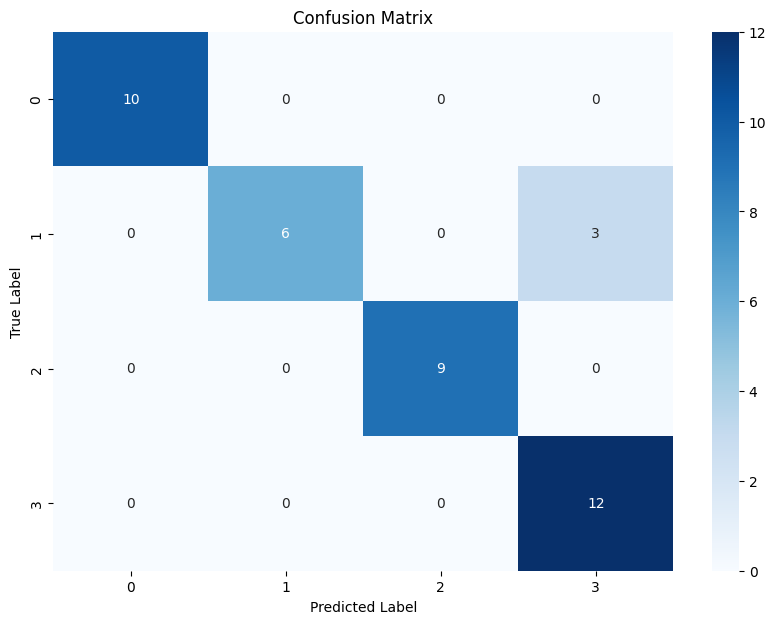

In [14]:
# Load images and labels
images = []
labels = []

for class_name, class_label in class_labels.items():
    class_dir = os.path.join(data_dir, class_name)
    for filename in os.listdir(class_dir):
        image_path = os.path.join(class_dir, filename)
        image = cv2.imread(image_path)
        if image is not None:  # Check if the image is valid
            # Preprocess image here if needed (e.g., resize, grayscale conversion)
            image = cv2.resize(image, (100, 100))  # Resize images to a fixed size
            images.append(image.flatten())  # Flatten images into one-dimensional array
            labels.append(class_label)

# Convert lists to numpy arrays
x = np.array(images)
y = np.array(labels)

# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Create and train Random Forest model
model = RandomForestClassifier(n_estimators=100, max_depth=5)
model.fit(x_train, y_train)

# Evaluate on test set
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print('Test accuracy:', accuracy)

# Print classification report and confusion matrix
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [6]:
from sklearn.ensemble import RandomForestClassifier
import sklearn.ensemble as ensemble
from sklearn.model_selection import GridSearchCV

rf = ensemble.RandomForestClassifier()
# Define parameter grid for RFC
param_grid = {
    'n_estimators': [100, 150, 200, 250, 300],  # Number of trees in the forest
    'max_depth': [5, 10, 15, 20, 25],     # Maximum depth of individual trees
}

# Create and fit the GridSearchCV with RFC
#rfc = RandomForestClassifier()
#model = RandomForestClassifier(n_estimators=100, max_depth=5)
#model.fit(x_train, y_train)
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv=5)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 15, 20, 25],
                         'n_estimators': [100, 150, 200, 250, 300]})

In [7]:
best_params = grid_search.best_params_
print("Best parameters:", best_params)

Best parameters: {'max_depth': 10, 'n_estimators': 200}


In [8]:
model_tuned = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=2, min_samples_leaf=1,oob_score=True)
model_tuned.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=200, oob_score=True)

In [9]:
oob_score = model_tuned.oob_score_
print("Out-of-Bag Score:", oob_score)

Out-of-Bag Score: 0.9375


Test accuracy: 0.925
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.89      0.80      0.84        10
           2       1.00      1.00      1.00         8
           3       0.78      0.88      0.82         8

    accuracy                           0.93        40
   macro avg       0.92      0.92      0.92        40
weighted avg       0.93      0.93      0.93        40



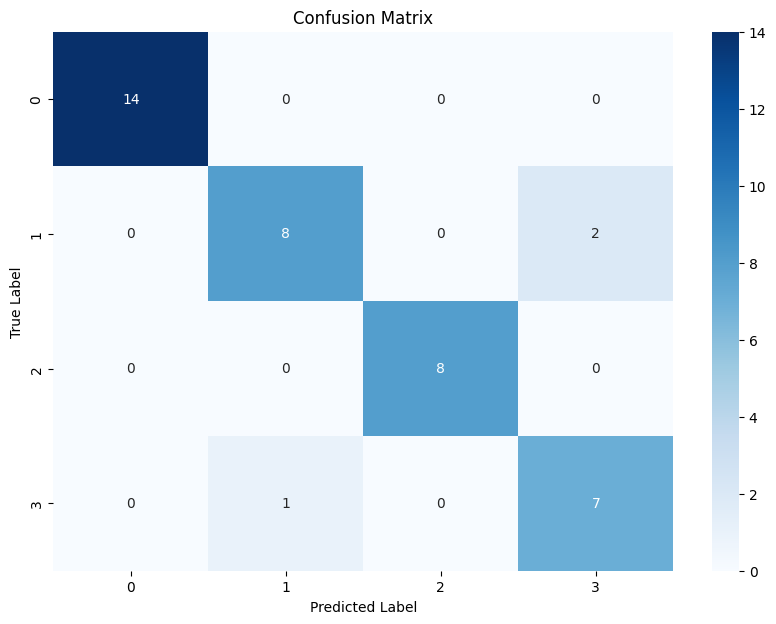

In [10]:
# Evaluate on test set
y_pred_new = model_tuned.predict(x_test)
accuracy_new = accuracy_score(y_test, y_pred_new)
print('Test accuracy:', accuracy_new)

# Print classification report and confusion matrix
print(classification_report(y_test, y_pred_new))

cm = confusion_matrix(y_test, y_pred_new)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [12]:
import joblib

joblib.dump(model_tuned, os.path.join(data_dir, "model.joblib"))

['D:\\TrafficLightTrainingDataset\\Predict 50 for each classes\\model.joblib']